In [2]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(46)
torch.set_default_device(device)

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    download=True,
)
test_data = datasets.MNIST(root="data", train=False, transform=ToTensor())
X_train_not_normalized = train_data.data.float()
y_train = train_data.targets
X_test_not_normalized = test_data.data.float()
y_test = test_data.targets

X_train_not_normalized.shape, y_train.shape, X_test_not_normalized.shape, y_test.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

In [4]:
X_train = (X_train_not_normalized - X_train_not_normalized.min()) / (
    X_train_not_normalized.max() - X_train_not_normalized.min()
)
X_test = (X_test_not_normalized - X_test_not_normalized.min()) / (
    X_test_not_normalized.max() - X_test_not_normalized.min()
)

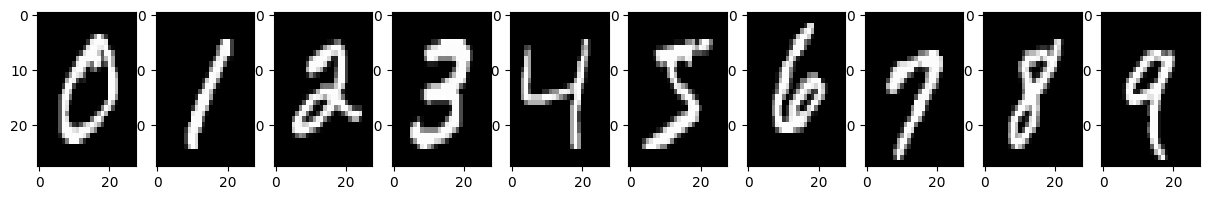

In [5]:
import matplotlib.pyplot as plt
from matplotlib import colors

classes = y_train.unique()
i = 0
class_images = []
for i in classes:
    class_images.append(X_train[y_train == i][0])

f, axarr = plt.subplots(1, 10, figsize=(15, 2))
for i in range(len(class_images)):
    axarr[i].imshow(class_images[i].cpu(), cmap="gray", aspect="auto")
plt.show()

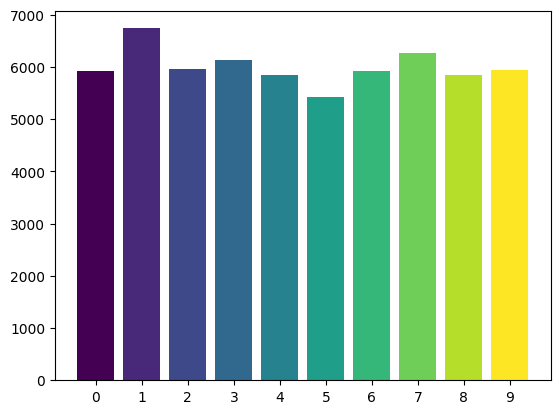

In [24]:
_, counts = torch.unique(y_train, return_counts=True)

bar = plt.bar(classes, counts, align="center")

patches = bar.patches

plt.gca().set_xticks(classes)

fractions = (classes / classes.max()).cpu()
norm = colors.Normalize(fractions.min(), fractions.max())
for fraction, patch in zip(fractions, patches):
    color = plt.cm.viridis(norm(fraction))
    patch.set_facecolor(color)

plt.show()